In [31]:
%matplotlib inline
import cv2

import numpy as np
import matplotlib.pyplot as plt

import os
import sys
cwd = os.getcwd()
sys.path.append(os.path.join(cwd, '..'))

from sklearn.externals import joblib
from aye.preprocessing import *

In [2]:
# Load classifier and scaler
clf = joblib.load('../model/svc.pkl')
scaler = joblib.load('../model/scaler.pkl')

In [38]:
# Load image
im_dir = os.path.join(cwd, 'images')
im = cv2.imread(os.path.join(im_dir, 'frame0000.jpg'))
im = im[200:1000, :1480, :]

s = Samples(im)
X = scaler.transform(s.X())
y = clf.predict(X)
y_proba = clf.predict_proba(X)
bw = s.y_to_bw(y)
plt.imshow(bw)

AttributeError: predict_proba is not available when  probability=False

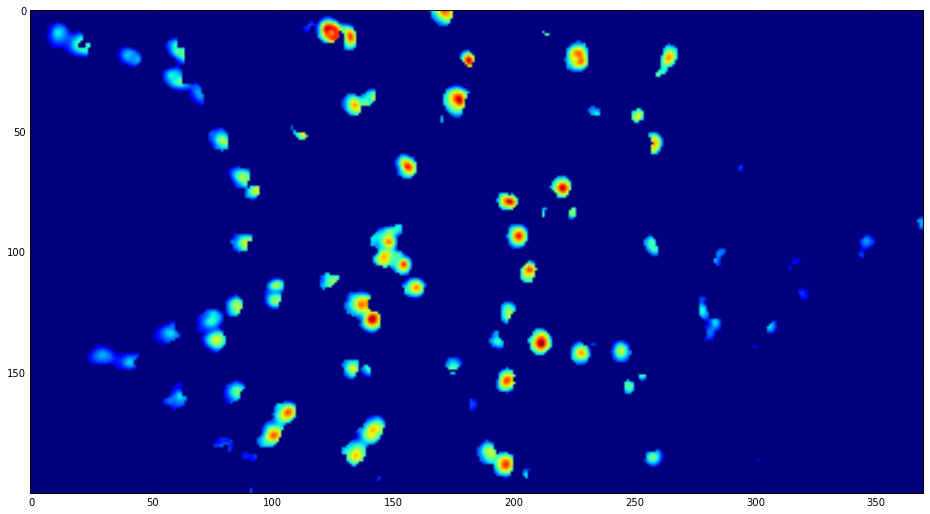

In [37]:
im_hsv = s.im_lab
im_hsv[~bw] = 0
fig = plt.figure(figsize=(16,10))
plt.imshow(im_hsv[:,:,0])